In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import glob

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras import regularizers
from keras.layers import Dropout

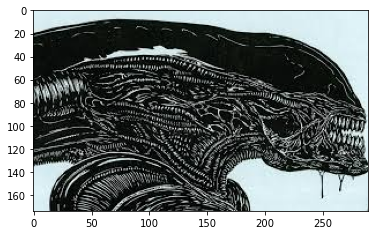

In [2]:
alien_example = cv2.imread('/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/train/alien/1.jpg')
plt.imshow(alien_example)
plt.show()

In [3]:
alien_example = np.array(alien_example)
alien_example.shape

(174, 290, 3)

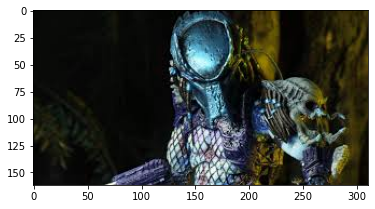

In [4]:
predator_example = cv2.imread('/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/train/predator/1.jpg')
plt.imshow(predator_example)
plt.show()

In [5]:
predator_example = np.array(predator_example)
predator_example.shape

(162, 311, 3)

Text(0.5, 1.0, 'Predator and Alien of Train')

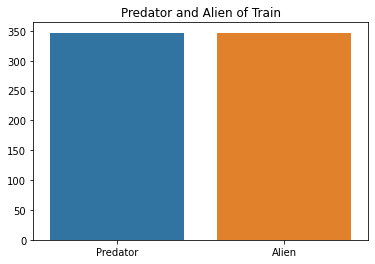

In [6]:
path_train = '/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/train'
path_valid = '/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation'

predator = glob.glob(path_train+"/predator/*.jpg")
alien = glob.glob(path_train+"/alien/*.jpg")

sns.barplot(x=["Predator","Alien"],y=[len(predator),len(alien)])
plt.title('Predator and Alien of Train')

Text(0.5, 1.0, 'Train and Valid')

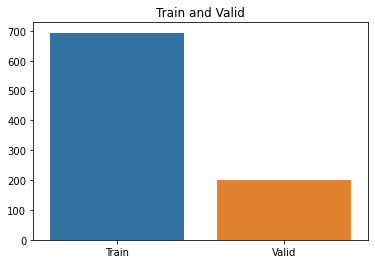

In [7]:
train = list(glob.glob(path_train+'/**/*.jpg'))
valid = list(glob.glob(path_valid+'/**/*.jpg'))

sns.barplot(x=["Train","Valid"],y=[len(train),len(valid)])
plt.title('Train and Valid')

In [8]:
from tensorflow.keras.optimizers import Adam

classifier = Sequential()

classifier.add(Convolution2D(filters = 32, kernel_size=(3,3), data_format= "channels_last", 
                             input_shape=(64, 64, 3), activation="relu"))
classifier.add(MaxPooling2D(pool_size = (2,2)))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Flatten())
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
opt = Adam(learning_rate = 0.001, beta_1 = 0.9,beta_2 = 0.99)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale = 1./255,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(
    '/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/train/', 
    target_size = (64, 64), 
    batch_size = 32, 
    class_mode = 'binary')

Found 694 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory(
        '/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/',
        target_size = (64, 64),
        batch_size = 32,
        class_mode = 'binary')

Found 200 images belonging to 2 classes.


In [12]:
len(training_set)

22

In [13]:
len(test_set)

7

In [14]:
history = classifier.fit(
        training_set,
        steps_per_epoch = 22,
        epochs = 20,
        validation_data = test_set,
        validation_steps = 7)

Epoch 1/20
22/22 [==============================] - 3s 115ms/step - loss: 0.6856 - accuracy: 0.5403 - val_loss: 0.6518 - val_accuracy: 0.6000
Epoch 2/20
22/22 [==============================] - 2s 93ms/step - loss: 0.6349 - accuracy: 0.6383 - val_loss: 0.6175 - val_accuracy: 0.5850
Epoch 3/20
22/22 [==============================] - 2s 92ms/step - loss: 0.5733 - accuracy: 0.7032 - val_loss: 0.5773 - val_accuracy: 0.6300
Epoch 4/20
22/22 [==============================] - 2s 88ms/step - loss: 0.5408 - accuracy: 0.7133 - val_loss: 0.5626 - val_accuracy: 0.6850
Epoch 5/20
22/22 [==============================] - 2s 88ms/step - loss: 0.5219 - accuracy: 0.7089 - val_loss: 0.6446 - val_accuracy: 0.6500
Epoch 6/20
22/22 [==============================] - 2s 89ms/step - loss: 0.5310 - accuracy: 0.7406 - val_loss: 0.7571 - val_accuracy: 0.5950
Epoch 7/20
22/22 [==============================] - 2s 89ms/step - loss: 0.5428 - accuracy: 0.7421 - val_loss: 0.5327 - val_accuracy: 0.7300
Epoch 8/20
2

In [15]:
classifier.evaluate(test_set)

7/7 [==============================] - 0s 24ms/step - loss: 0.4987 - accuracy: 0.7700


[0.4986732006072998, 0.7699999809265137]

In [23]:
classifier.evaluate(training_set)

22/22 [==============================] - 2s 69ms/step - loss: 0.2835 - accuracy: 0.8818


[0.28347209095954895, 0.8818444013595581]

In [16]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

89.jpg
Probability that it is a alien =  1.00


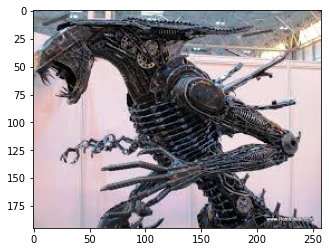

In [17]:
import os

S = 64

directory = os.listdir("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/alien")
print(directory[3])

imgAlien = cv2.imread("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/alien/" + directory[3])
plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))

60.jpg
Probability that it is a alien =  1.00


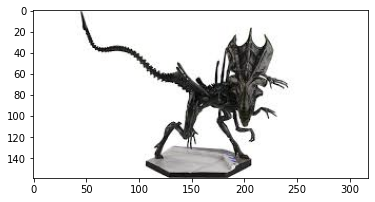

In [18]:
S = 64

directory = os.listdir("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/alien")
print(directory[7])

imgAlien = cv2.imread("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/alien/" + directory[7])
plt.imshow(imgAlien)

imgAlien = cv2.resize(imgAlien, (S,S))
imgAlien = imgAlien.reshape(1,S,S,3)

pred = classifier.predict(imgAlien)
print("Probability that it is a alien = ", "%.2f" % (1-pred))

72.jpg
Probability that it is a alien =  0.00


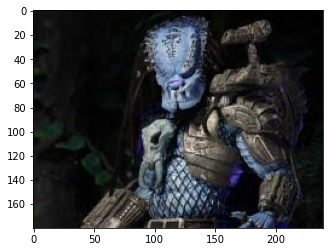

In [19]:
directory = os.listdir("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/predator")
print(directory[20])

imgPredator = cv2.imread("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/predator/" + directory[20])
plt.imshow(imgPredator)

imgPredator = cv2.resize(imgPredator, (S,S))
imgPredator = imgPredator.reshape(1,S,S,3)

pred = classifier.predict(imgPredator)
print("Probability that it is a alien = ", "%.2f" % (1-pred))

8.jpg
Probability that it is a alien =  1.00


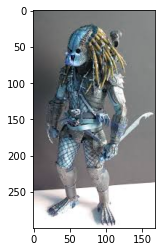

In [42]:
directory = os.listdir("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/predator")
print(directory[18])

imgPredator = cv2.imread("/Users/roecii/Downloads/ML_dataset/alien_vs_predator_thumbnails/data/validation/predator/" + directory[18])
plt.imshow(imgPredator)

imgPredator = cv2.resize(imgPredator, (S,S))
imgPredator = imgPredator.reshape(1,S,S,3)

pred = classifier.predict(imgPredator)
print("Probability that it is a alien = ", "%.2f" % (1-pred))

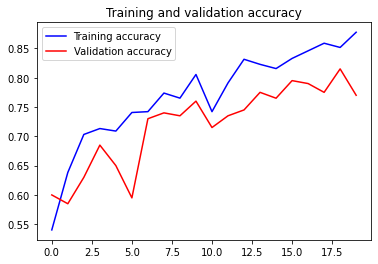

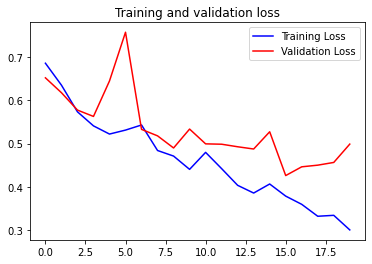

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()